<a href="https://colab.research.google.com/github/zhang8yiming/ComputerVision/blob/main/TF_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 快速上手

## 目录
- TensorFlow 介绍
- TensorFlow 主要框架
- TensorFlow 教程（官方翻译）

## TensorFlow 介绍
TensorFlow是一个数值处理库，最初由谷歌开发，供研究人员和机器学习从业者用于进行机器学习研究。您可以使用 TensorFlow 执行任何数值运算，它主要用于训练和运行深度神经网络。
TensorFlow 是一个基于 Python 的深度学习框架。TensorFlow 最初由 Google 大脑小组的研究员和工程师们开发出来，用于机器学习和深度神经网络方面的研究。

## TensorFlow 主要架构
TensorFlow 架构具有多个抽象层级。

其中 Keras 是 TensorFlow 的用户友好、模块化和可扩展的包装器。

## TensorFlow 安装
- CPU <br>
>`conda install tensorflow` 或 `pip install tensorflow`<br>
- GPU
>`conda install tensorflow-gpu` 或 `pip install tensorflow-gpu`


## TensorFlow 基础
### 什么是张量？
Tensorflow 的名字直接来源于它的核心框架：Tensor。在 TensorFlow 中，所有的计算都涉及到张量。张量是代表所有类型数据的 n 维向量或矩阵。张量中的所有值都包含具有已知（或部分已知）形状的相同数据类型。数据的形状是矩阵或数组的维数。

#### 张量的表示
在 TensorFlow 中，张量是 n 维特征向量（即数组）的集合。例如，有一个值从 1 到 6 的 2×3 矩阵：
$$
\left[\begin{matrix}1&2&3\\4&5&6\end{matrix}\right]
$$
TensorFlow 将此矩阵表示为：
```python
[[1, 2, 3], 
   [4, 5, 6]]
```





Tensor 对象作为 TensorFlow 的基本组件，用于存储数学上的值，包含固定值（使用tf.constant创建）或变量值（使用tf.Variable创建）。

#### 创建张量
要创建常量，可以使用 tf.constant()

代码示例如下：

In [14]:
import tensorflow as tf 
c = tf.constant([[1,2,3],                 
                 [4,5,6]],tf.int32)

print("Python List input: {}".format(c.get_shape()))
print("Python List input: {}".format(c.shape))
print("type is : {}".format(c.dtype)) # 可以使用属性 dtype 返回类型

Python List input: (2, 3)
Python List input: (2, 3)
type is : <dtype: 'int32'>


get_shape（）方法返回张量的形状为整数元组。整数对应于张量的维数，每个整数是沿该维的数组条目数。例如，（2，3）的形状表示矩阵，因为它具有两个整数，矩阵的大小为2×3。

如果创建一个值从 1 到 8 的三维矩阵（两个2×2矩阵）：
![](https://files.mdnice.com/user/34281/fc67e1c6-d0d8-417a-af35-b1a9e4254e34.png)

TensorFlow 将此矩阵表示为：
```python
[ [[1, 2],   
   [3, 4]],   
       [[5, 6],   
        [7, 8]]]
```

In [4]:
c = tf.constant([[[1, 2],   
                  [3, 4]],   
                  [[5, 6],   
                  [7, 8]]])

print("3d NumPy array input: {}".format(c.get_shape()))

3d NumPy array input: (2, 2, 2)


在创建张量期间未指定参数时，TensorFlow 会自动选择数据类型。TensorFlow 会猜测最可能的数据类型。例如，如果传递一个文本，它会猜测它是一个字符串并将其转换为字符串。

### TensorFlow 图
TensorFlow 1.x 使用有向无环图（Directed Acyclic Graph，DAG）表示运算操作。在 TensorFlow 2.x 中，图的创建不再由用户处理。新版本大大提高了可用性，同时仍保持了性能。

接下来 探讨 TensorFlow 的内部工作原理，简要地说明如何创建图。

TensorFlow 2.x 中的主要变化是即时执行（eager execution）。之前 TensorFlow 1.x 在默认情况下总是使用延迟执行（lazy execution）。它之所以称为延迟，是因为直到被明确请求，操作才由框架运行。

假设 a、b 和 c 是张量矩阵，以下代码将计算两个新值：d 和 e。使用即时执行，TensorFlow 将计算 d 的值，然后计算 e 的值。

In [15]:
@tf.function
def compute(a, b, c):
  d = a * b + c    
  e = a * b * c
  return d, e

当第一次调用compute函数时，TensorFlow 将创建如下图所示的图：


### 创建变量
要创建变量，请提供一个初始值。tf.Variable 与初始值的 dtype 相同。


In [16]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

print("Shape: ",my_variable.shape)
print("DType: ",my_variable.dtype)
print("As NumPy: ", my_variable.numpy)

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>>


### 梯度和自动微分
TensorFlow 2.x 提供了一种在使用即时执行模式下进行自动微分的方法——梯度带<br>

计算梯度
>要实现自动微分，TensorFlow 需要记住在前向传递过程中哪些运算以何种顺序发生。随后，在后向传递期间，TensorFlow 以相反的顺序遍历此运算列表来计算梯度。

梯度带
>TensorFlow 为自动微分提供了 tf.GradientTape API；即计算某个计算相对于某些输入（通常是 tf.Variable）的梯度。TensorFlow 会将在 tf.GradientTape 上下文内执行的相关运算“记录”到“条带”上。TensorFlow 随后会该使用条带通过反向模式微分计算“记录的”计算的梯度。




In [25]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

记录一些运算后，使用 GradientTape.gradient(target, sources) 计算某个损失相对于某个模型变量的梯度。

In [26]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

上方示例使用标量，但是 tf.GradientTape 在任何张量上都可以轻松运行：

In [27]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])

print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


# TensorFlow 教程（官方翻译）

Note: 我们的 TensorFlow 社区翻译了这些文档。因为社区翻译是尽力而为， 所以无法保证它们是最准确的，并且反映了最新的
[官方英文文档](https://tensorflow.google.cn/?hl=en)。如果您有改进此翻译的建议， 请提交 pull request 到
[tensorflow/docs](https://github.com/tensorflow/docs) GitHub 仓库。要志愿地撰写或者审核译文，请加入
[docs-zh-cn@tensorflow.org Google Group](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-zh-cn)。

## 基于Keras对数据集MNIST进行数字识别
导入安装好的 TensorFlow 2.0 ：

In [17]:
# 安装 TensorFlow

import tensorflow as tf

载入并准备好 [MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。将样本从整数转换为浮点数：


In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


将模型的各层堆叠起来，以搭建 `tf.keras.Sequential` 模型。为训练选择优化器和损失函数：

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 为训练选择优化器与损失函数：

请注意，使用model.summary（）可以获得有关模型、输出及其权重的描述：

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


训练并验证模型：

In [21]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1435 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1074 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9765
313/313 - 1s - loss: 0.0823 - accuracy: 0.9769 - 561ms/epoch - 2ms/step


[0.08233106881380081, 0.9768999814987183]

现在，这个照片分类器的准确度已经达到 98%。想要了解更多，请阅读 [TensorFlow 教程](https://tensorflow.google.cn/tutorials/)。

## 基本分类：对服装图像进行分类

本指南将训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类。即使您不理解所有细节也没关系；这只是对完整 TensorFlow 程序的快速概述，详细内容会在您实际操作的同时进行介绍。

本指南使用了 [tf.keras](https://tensorflow.google.cn/guide/keras)，它是 TensorFlow 中用来构建和训练模型的高级 API。

In [22]:
# 导入 TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入 需要的包 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


### 导入 Fashion MNIST 数据集

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，如下所示：

<table>
  <tr><td>     <img alt="Fashion MNIST sprite" src="https://tensorflow.google.cn/images/fashion-mnist-sprite.png" class=""> </td></tr>
  <tr><td align="center">     <b>图 1.</b>  <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a>（由 Zalando 提供，MIT 许可）。<br>
</td></tr>
</table>

Fashion MNIST 旨在临时替代经典 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与您将使用的衣物图像的格式相同。

本指南使用 Fashion MNIST 来实现多样化，因为它比常规 MNIST 更具挑战性。这两个数据集都相对较小，都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的起点。

在本指南中，我们使用 60,000 个图像来训练网络，使用 10,000 个图像来评估网络学习对图像分类的准确率。您可以直接从 TensorFlow 访问 Fashion MNIST。请运行以下代码，直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- *测试集*、`test_images` 和 `test_labels` 数组会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。*标签*是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装*类*：

<table>
  <tr>
    <th>标签</th>
    <th>类</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T恤/上衣</td>
  </tr>
  <tr>
    <td>1</td>
    <td>裤子</td>
  </tr>
    <tr>
    <td>2</td>
    <td>套头衫</td>
  </tr>
    <tr>
    <td>3</td>
    <td>连衣裙</td>
  </tr>
    <tr>
    <td>4</td>
    <td>外套</td>
  </tr>
    <tr>
    <td>5</td>
    <td>凉鞋</td>
  </tr>
    <tr>
    <td>6</td>
    <td>衬衫</td>
  </tr>
    <tr>
    <td>7</td>
    <td>运动鞋</td>
  </tr>
    <tr>
    <td>8</td>
    <td>包</td>
  </tr>
    <tr>
    <td>9</td>
    <td>短靴</td>
  </tr>
</table>

每个图像都会被映射到一个标签。由于数据集不包括*类名称*，请将它们存储在下方，供稍后绘制图像时使用：

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 浏览数据

在训练模型之前，我们先浏览一下数据集的格式。以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [ ]:
train_images.shape

(60000, 28, 28)

同样，训练集中有 60,000 个标签：

In [ ]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [ ]:
test_images.shape

(10000, 28, 28)

测试集包含 10,000 个图像标签：

In [ ]:
len(test_labels)

10000

### 预处理数据

在训练网络之前，必须对数据进行预处理。如果您检查训练集中的第一个图像，您会看到像素值处于 0 到 255 之间：

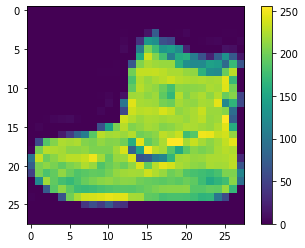

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，请将这些值除以 255。请务必以相同的方式对*训练集*和*测试集*进行预处理：

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确，以及您是否已准备好构建和训练网络，让我们显示*训练集*中的前 25 个图像，并在每个图像下方显示类名称。

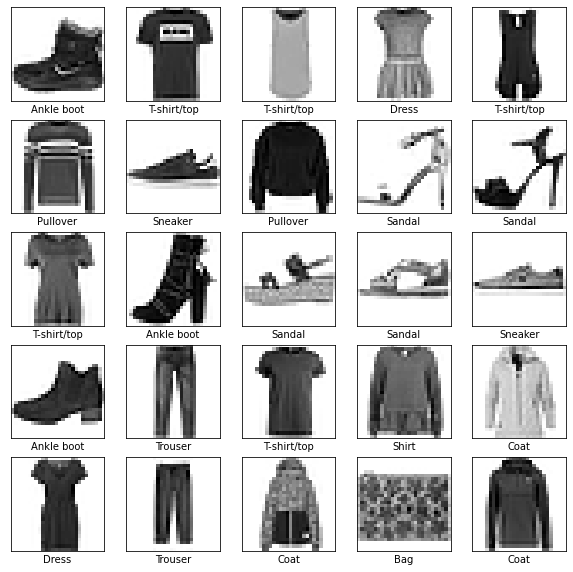

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) # 图例的名字是标签
plt.show()

### 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

#### 设置层

神经网络的基本组成部分是*层*。层会从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。

大多数深度学习都包括将简单的层链接在一起。大多数层（如 `tf.keras.layers.Dense`）都具有在训练期间才会学习的参数。

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

#### 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的*编译*步骤中添加的：

- *损失函数* - 用于测量模型在训练期间的准确率。您会希望最小化此函数，以便将模型“引导”到正确的方向上。
- *优化器* - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- *指标* - 用于监控训练和测试步骤。以下示例使用了*准确率*，即被正确分类的图像的比率。

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 `train_images` 和 `train_labels` 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 `test_images` 数组）进行预测。
4. 验证预测是否与 `test_labels` 数组中的标签相匹配。


#### 向模型馈送数据

要开始训练，请调用 `model.fit` 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4954 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3744 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2475 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。

#### 评估准确率

接下来，比较模型在测试数据集上的表现：

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3385 - accuracy: 0.8804 - 490ms/epoch - 2ms/step

Test accuracy: 0.8804000020027161


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表*过拟合*。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。

#### 进行预测

在模型经过训练后，您可以使用它对一些图像进行预测。模型具有线性输出，即 [logits](https://developers.google.com/machine-learning/glossary#logits)。您可以附加一个 softmax 层，将 logits 转换成更容易理解的概率。 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

在上例中，模型预测了测试集中每个图像的标签。我们来看看第一个预测结果：

In [ ]:
predictions[0]

array([6.9745077e-08, 1.4142753e-09, 6.5676051e-09, 1.5905698e-10,
       5.5043222e-07, 5.4536755e-03, 2.0498339e-07, 1.1893704e-02,
       1.1581202e-08, 9.8265171e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。您可以看到哪个标签的置信度值最大：

In [ ]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 `class_names[9]`。通过检查测试标签发现这个分类是正确的：

In [ ]:
test_labels[0]

9

您可以将其绘制成图表，看看模型对于全部 10 个类的预测。

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 验证预测结果

在模型经过训练后，您可以使用它对一些图像进行预测。

我们来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

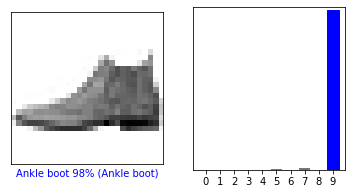

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

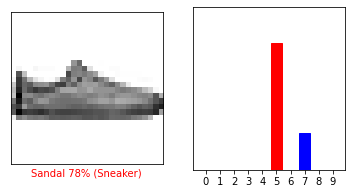

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

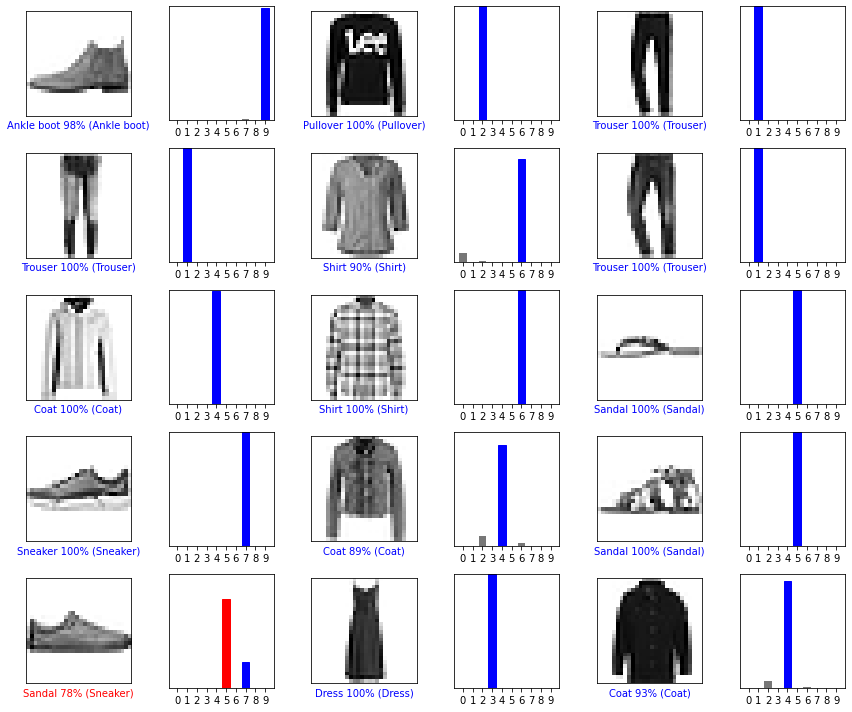

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 使用训练好的模型

最后，使用训练好的模型对单个图像进行预测。

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型经过了优化，可同时对一个*批*或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中：

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测这个图像的正确标签：

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.2635998e-06 1.3989353e-15 9.9925929e-01 1.5325074e-12 2.2702348e-04
  1.2639450e-13 5.1139895e-04 3.5769171e-14 5.9192614e-13 2.5162774e-14]]


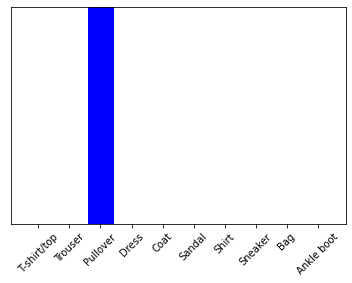

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [ ]:
np.argmax(predictions_single[0])

2

该模型会按照预期预测标签。